In [1]:
from math import e, factorial,log, gamma, sqrt, floor, exp
import re
from matplotlib import pyplot as pt
from analysis import *

In [2]:
f1 = open("r1-d0-result.txt")
raw1 = f1.read()
f1.close()

f2 = open("r1-d1-result.txt")
raw2 = f2.read()
f2.close()

f3 = open("r5-d0-result.txt")
raw3 = f3.read()
f3.close()

f4 = open("r5-d1-result.txt")
raw4 = f4.read()
f4.close()

f5 = open("r7-d0-result.txt")
raw5 = f5.read()
f5.close()

f6 = open("r7-d1-result.txt")
raw6 = f6.read()
f6.close()

Ttx = 1
Trx = 10
Tn = 1

In [3]:
Eb1,Es1,En1 = computeEvents(raw1,Ttx,Trx,Tn)
Eb2,Es2,En2 = computeEvents(raw2,Ttx,Trx,Tn)
Eb3,Es3,En3 = computeEvents(raw3,Ttx,Trx,Tn)
Eb4,Es4,En4 = computeEvents(raw4,Ttx,Trx,Tn)
Eb5,Es5,En5 = computeEvents(raw5,Ttx,Trx,Tn)
Eb6,Es6,En6 = computeEvents(raw6,Ttx,Trx,Tn)

In [4]:
Pb1 = Eb1/len(raw1)
Ps1 = 1-Pb1

Pb2 = Eb2/len(raw1)
Ps2 = 1-Pb2

Pb3 = Eb3/len(raw1)
Ps3 = 1-Pb3

Pb4 = Eb4/len(raw1)
Ps4 = 1-Pb4

Pb5 = Eb5/len(raw1)
Ps5 = 1-Pb5

Pb6 = Eb6/len(raw1)
Ps6 = 1-Pb6

print(Ps1*Pb2)
print(Ps3*Pb4)
print(Ps5*Pb6)

0.24946239309673998
0.08272184742312
0.03945967829142


In [5]:
scan1 = findScanInterval(raw2,raw1,Ttx,Trx)
scan2 = findScanInterval(raw4,raw3,Ttx,Trx)
scan3 = findScanInterval(raw6,raw5,Ttx,Trx)

hist1 = generateHistogram(scan1,Trx)
hist2 = generateHistogram(scan2,Trx)
hist3 = generateHistogram(scan3,Trx)

geom_d1 = geom_dist(hist1[1],len(hist1))
geom_d2 = geom_dist(hist2[0],len(hist2))
geom_d3 = geom_dist(hist3[0],len(hist3))

pois_d1 = poisson_dist(Trx*Eb2/len(raw1),len(hist1))
pois_d2 = poisson_dist(Trx*Eb4/len(raw3),len(hist2))
pois_d3 = poisson_dist(Trx*Eb6/len(raw5),len(hist3))
print('--------------------')
print('Poisson RMSE:')
print(rmse(pois_d1,hist1))
print(rmse(pois_d2,hist2))
print(rmse(pois_d3,hist3))
print('--------------------')
print('Geometric RMSE:')
print(rmse(geom_d1,hist1))
print(rmse(geom_d2,hist2))
print(rmse(geom_d3,hist3))
gamma_d1 = gamma_dist(Trx*Eb2/len(raw1),len(hist1),2.3)
gamma_d2 = gamma_dist(hist2[1],len(hist2),1)
print(sum(gamma_d2))
gamma_d3 = gamma_dist(Trx*Eb6/len(raw1),len(hist1),2.3)
print('--------------------')
print(rmse(gamma_d1,hist1))
print(rmse(gamma_d2,hist2))
print(rmse(gamma_d3,hist3))

--------------------
Poisson RMSE:
0.08270444520841785
0.04314299611192641
0.019834794600197152
--------------------
Geometric RMSE:
0.04782747629282436
0.0073309090190740115
0.0030808306400639442
1.0852783182660841
--------------------
0.09920602085025551
0.08230901541931158
0.2296121221968239


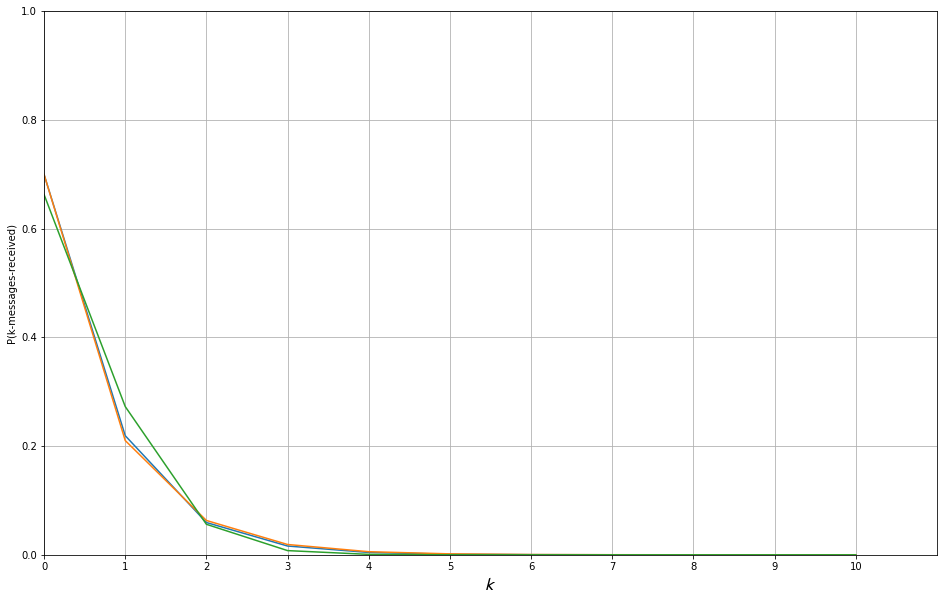

In [6]:
pt.rcParams["figure.figsize"] = (16,10)
#pt.plot(range(Trx+1),hist1)
#pt.plot(range(Trx+1),gamma_d1)
#pt.plot(range(Trx+1),gamma_d2)
#pt.plot(range(Trx+1),gamma_d3)
#pt.plot(range(Trx+1),hist2)
pt.plot(range(Trx+1),hist3)
#pt.plot(range(Trx+1),geom_d1)
#pt.plot(range(Trx+1),geom_d2)
pt.plot(range(Trx+1),geom_d3)
#pt.plot(range(Trx+1),pois_d1)
#pt.plot(range(Trx+1),pois_d2)
pt.plot(range(Trx+1),pois_d3)
pt.axis([0,Trx+1,0,1.0])
pt.xticks(range(Trx+1), [str(int(n)) for n in range(Trx+1)])
pt.xlabel(r'$\mathcal{k}$', fontsize = 18)
pt.ylabel(r'P(k-messages-received)')
pt.grid(True)
pt.show()